# Import Libraries

In [125]:
import matplotlib.pyplot as plt

#kears and tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import Recall, Precision

In [126]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

- Loaded Keras built in dataset

In [127]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


- It is changing its shape from (60000, 28, 28) to (60000, 784). The original shape might represent 28x28 pixel images (common in image datasets like MNIST), and reshaping it into a 1D array of length 784 allows each image to be treated as a flat vector.

- The values in the array are then normalized by dividing each element by 255. This step is common when working with image data. Pixel values in images are typically in the range of 0 to 255, where 0 is black and 255 is white. Normalizing by 255 scales these values to be between 0 and 1. This normalization is done to make training more stable and to help the optimization algorithm converge faster.

In [128]:
x_train[0].shape

(28, 28)

- for single image size is 28 X 28

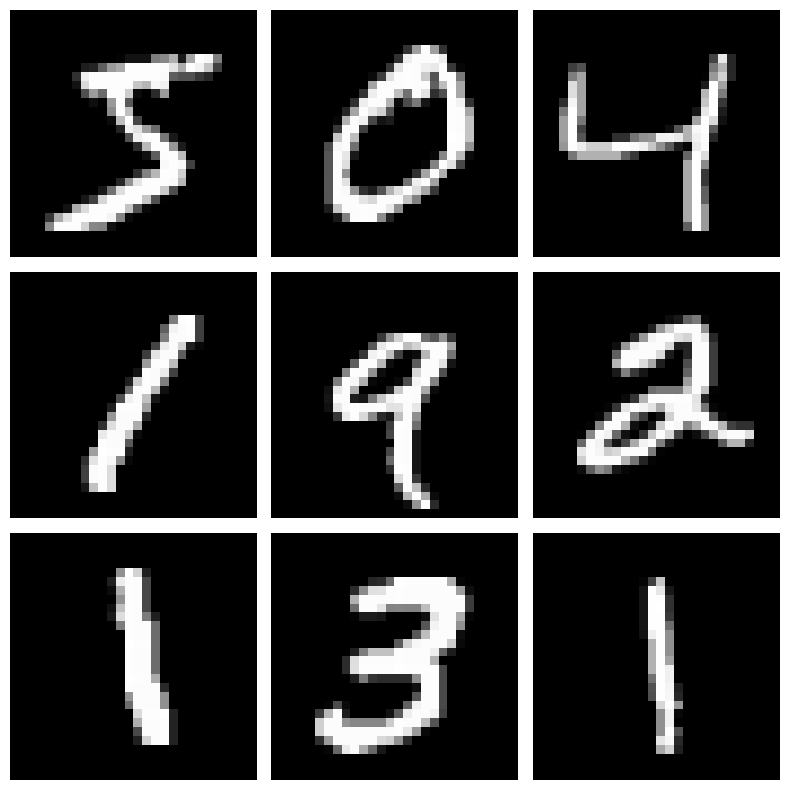

In [129]:
# Create a subplot with 3 rows and 3 columns (as there are 9 images)
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# Iterate through the first 9 images in x_train
for i in range(9):
    image_to_show = x_train[i]

    # Calculate the row and column indices for the subplot
    row_index = i // 3
    col_index = i % 3

    # Display the image in the specified subplot
    axes[row_index, col_index].imshow(image_to_show, cmap='gray')
    axes[row_index, col_index].axis('off')  # Turn off axis labels for cleaner display

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Data Preprocessing Steps

### Reshape
The `x_train` and `x_test` datasets are reshaped from 3D arrays (representing images) to 2D arrays. Each image, originally in the shape of 28x28 pixels (assuming the MNIST dataset or similar), is flattened into a 1D array of 784 elements.

### Data Type Conversion
The data type of the arrays is converted to float32. Neural networks often perform well with 32-bit floating-point precision, and using float32 reduces memory requirements compared to float64.

### Normalization
The pixel values in the reshaped arrays are normalized by dividing them by 255. This operation scales the pixel values from the original range of [0, 255] to the normalized range of [0, 1]. Normalization is a common practice in machine learning, helping in numerical stability and faster convergence during training.


In [130]:
# image size is 28 x28
x_train = x_train.reshape(60000,784).astype("float32") /255
x_test = x_test.reshape(10000,784).astype("float32") /255


# Model Define

In [131]:
x_train.shape[1]

784

In [132]:
model= models.Sequential()
# add input layer
model.add(Dense(units=784, input_dim=x_train.shape[1], activation='relu'))
# add hidden layer
model.add(layers.Dense(128,activation='relu'))
# add out put layer
model.add(layers.Dense(10, activation='softmax'))


# Model Compile

In [133]:
model.compile (
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=['accuracy'],
)

# Model Summery

In [134]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 784)               615440    
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717210 (2.74 MB)
Trainable params: 717210 (2.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


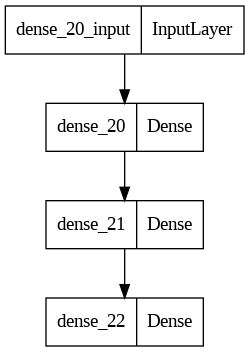

In [135]:
keras.utils.plot_model(model, "My first model.png")

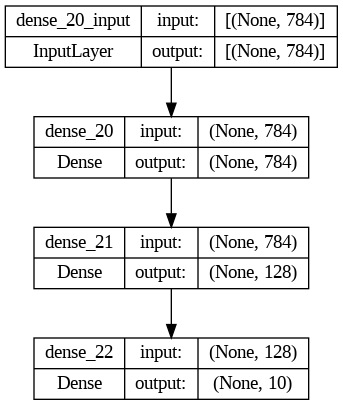

In [136]:
keras.utils.plot_model(model, "My first model.png", show_shapes=True)

# Model Fit

In [137]:
history= model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


750/750 [==============================] - 11s 13ms/step - loss: 0.2286 - accuracy: 0.9307 - val_loss: 0.1140 - val_accuracy: 0.9675
Epoch 2/5
750/750 [==============================] - 11s 15ms/step - loss: 0.0873 - accuracy: 0.9728 - val_loss: 0.1017 - val_accuracy: 0.9692
Epoch 3/5
750/750 [==============================] - 11s 15ms/step - loss: 0.0570 - accuracy: 0.9824 - val_loss: 0.1015 - val_accuracy: 0.9723
Epoch 4/5
750/750 [==============================] - 11s 14ms/step - loss: 0.0402 - accuracy: 0.9872 - val_loss: 0.0965 - val_accuracy: 0.9753
Epoch 5/5
750/750 [==============================] - 10s 13ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.1057 - val_accuracy: 0.9768


In [138]:
test_scores=model.evaluate(x_test, y_test, verbose=2)
print("Test Loss : ", test_scores[0])
print("Test Accuracy : ", test_scores[1])



313/313 - 2s - loss: 0.1007 - accuracy: 0.9764 - 2s/epoch - 6ms/step
Test Loss :  0.10067179054021835
Test Accuracy :  0.9764000177383423


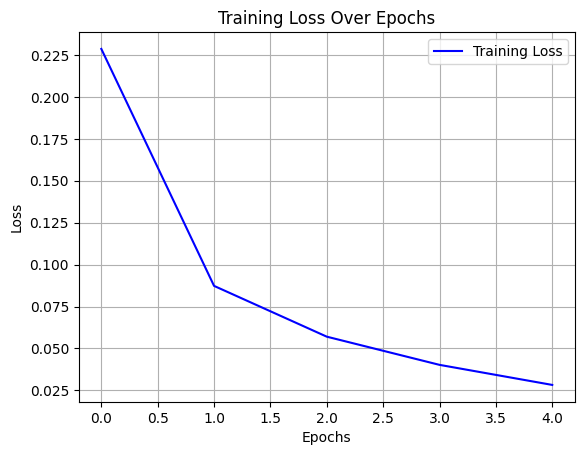

In [148]:
# Plotting the training loss
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


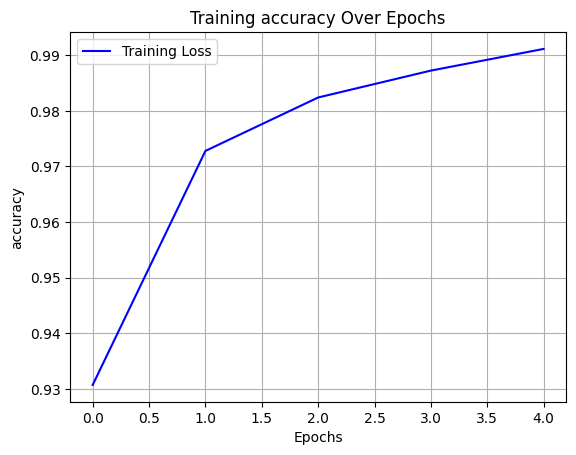

In [149]:

# Plotting the training loss
plt.plot(history.history['accuracy'], label='Training Loss', color='blue', linestyle='-')
plt.title('Training accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Model Save

In [139]:
model.save("my_first_deep_model.keras")

In [140]:
del model

In [141]:
model = keras.models.load_model('my_first_deep_model.keras')

In [142]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 784)               615440    
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
Total params: 717210 (2.74 MB)
Trainable params: 717210 (2.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
